In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import astropy.units as u
from astropy import coordinates
from astropy.time import Time
from astropy.table import Table, Column
from astropy.coordinates import Distance
from astropy.cosmology import WMAP7

In [3]:
from IPython.display import HTML
from ipywidgets import Layout, Box, widgets

In [4]:
df = pd.read_excel("photometric-monitoring.xlsx")

In [5]:
df

,3FHL_Name,3FHL_CLASS,3FHL_RAJ2000,3FHL_DEJ2000,Assoc1_Name,z_for_MC,z_LL,z_quality_comment,Livetime,Extension_Flag,High_S/N_spectra,Comment,Action,Spectro-Observations,Imaging-Observations
0,3FHL J0022.1-1855,bll,5.525983,-18.917013,1RXS J002209.2-185,0.774,True,NaN,20.0,N,Y?,z>0.774 Keck Shaw et al. 13 spectrum not in ar...,Spectroscopy in photometric minimum,NaN,NaN
1,3FHL J0033.5-1921,bll,8.392931,-19.357483,KUV 00311-1938,0.506,True,Clear MgII absorber,1.0,N,Y,Pita et al. 14,Spectroscopy in photometric minimum,NaN,NaN
2,3FHL J0035.2+1514,bll,8.817282,15.243119,RX J0035.2+1515,0.300,False,NaN,13.0,N,Y,"Paiano et al. 17, SDSS",Spectroscopy in photometric minimum,NaN,NaN
3,3FHL J0035.9+5950,bll,8.978161,59.835045,1ES 0033+595,0.300,False,Tentative redshift ?,1.0,NP,Y,"z=0.467 Tentative Paiano et al. 17, Nilsson et...",Spectroscopy in photometric minimum,NaN,NaN
4,3FHL J0120.4-2701,bll,20.115040,-27.027128,PKS 0118-272,0.558,True,NaN,4.0,N,Y,"Deep UVES spectra, HST imaging",Spectroscopy in photometric minimum,NaN,NaN
5,3FHL J0136.5+3906,bll,24.139187,39.101215,B3 0133+388,0.300,False,NaN,1.0,NP,Y,"Several high S/N spectra, no result",Spectroscopy in photometric minimum,NaN,NaN
6,3FHL J0211.2+1051,BLL,32.814346,10.858768,MG1 J021114+1051,0.300,False,NaN,4.0,YP,Y,Extended Meisner & Romani 2010,Spectroscopy in photometric minimum,NaN,NaN
7,3FHL J0222.6+4302,BLL,35.666264,43.034084,3C 66A,0.334,True,HST Ly alpha abs.+cluster,1.0,NP,Y,"Cluster z=0.34, Torres-Zafra et al. 18, Stadni...",Spectroscopy in photometric minimum,NaN,NaN
8,3FHL J0334.2-3726,bll,53.569492,-37.444336,PMN J0334-3725,0.300,False,NaN,16.0,n,Y,Shaw et al. 13 VLT spectrum,Spectroscopy in photometric minimum,NaN,NaN
9,3FHL J0449.4-4350,bll,72.361565,-43.833763,PKS 0447-439,0.300,False,Possible cluster,1.0,n,Y,"Cluster z=0.343, Muriel et al. 15",Spectroscopy in photometric minimum,NaN,NaN


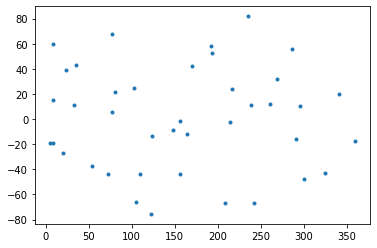

In [6]:
plt.plot(df["3FHL_RAJ2000"], df["3FHL_DEJ2000"], '.')

In [7]:
df.columns

Index(['3FHL_Name', '3FHL_CLASS', '3FHL_RAJ2000', '3FHL_DEJ2000',
       'Assoc1_Name', 'z_for_MC', 'z_LL', 'z_quality_comment', 'Livetime',
       'Extension_Flag', 'High_S/N_spectra', 'Comment', 'Action',
       'Spectro-Observations', 'Imaging-Observations'],
      dtype='object')

In [8]:
df["3FHL_RAJ2000"]

0       5.525983
1       8.392931
2       8.817282
3       8.978161
4      20.115040
5      24.139187
6      32.814346
7      35.666264
8      53.569492
9      72.361565
10     80.441720
11    102.697800
12    105.144450
13    109.673610
14    122.763880
15    124.106575
16    148.252910
17    155.684330
18    155.974430
19    164.789720
20    170.200880
21    192.075640
22    193.296570
23    208.409180
24    214.608230
25    235.031750
26    238.931230
27    242.668030
28    261.273700
29    268.546400
30    285.809570
31    290.465100
32    295.697020
33    299.934330
34    324.861820
35    340.982060
36    359.368960
37     77.001380
38     77.363625
39    216.756470
Name: 3FHL_RAJ2000, dtype: float64

In [9]:
from alerce.core import Alerce
client = Alerce()

In [10]:
help(client.query_objects)

Help on method query_objects in module alerce.search:

query_objects(format='pandas', index=None, sort=None, **kwargs) method of alerce.core.Alerce instance
    Gets a list of objects filtered by specified parameters.
    It is strongly advised to look at the documentation of `ALERCE ZTF API`_
    
    Parameters
    ----------
    format : str
        Return format. Can be one of 'pandas' | 'votable' | 'json'
    index : str
        Name of the column to use as index when format is 'pandas'
    sort : str
        Name of the column to sort when format is 'pandas'
    
    **kwargs
        Keyword arguments. Each argument can be one of the `ALERCE ZTF API`_
        object query parameters.
    
        - classifier : str
            classifier name
        - class_name : str
            class name
        - ndet : int[]
            Range of detections.
        - probability : float
            Minimum probability.
        - firstmjd : float[]
            First detection date range in m

In [11]:
query_results = []

for i in range(len(df["3FHL_DEJ2000"])):
    ra = df["3FHL_RAJ2000"][i]
    dec = df["3FHL_DEJ2000"][i]
    query_results.append(client.query_objects(ra=ra, dec=dec , radius=20))

In [12]:
query_results

[Empty DataFrame
 Columns: []
 Index: [],
             oid ndethist  ncovhist  mjdstarthist   mjdendhist  corrected  \
 0  ZTF18abtftkf      131       393  58333.418912  59219.17169       True   
 
    stellar  ndet   g_r_max  g_r_max_corr  ...      lastmjd    deltajd  \
 0     True    91  0.350603      0.296767  ...  59219.17169  849.84412   
 
      meanra    meandec   sigmara  sigmadec   class     classifier  \
 0  8.393234 -19.359215  0.000087   0.00008  Blazar  lc_classifier   
 
    probability     step_id_corr  
 0     0.682132  corr_bulk_0.0.1  
 
 [1 rows x 23 columns],
 Empty DataFrame
 Columns: []
 Index: [],
             oid ndethist  ncovhist  mjdstarthist    mjdendhist  corrected  \
 0  ZTF19abgzjrh       47      1214  58683.430764  58792.239688       True   
 
    stellar  ndet   g_r_max  g_r_max_corr  ...       lastmjd    deltajd  \
 0    False     7  0.784405      1.208196  ...  58792.239688  71.832697   
 
      meanra    meandec   sigmara  sigmadec  class  classifier

In [13]:
query_results[1].oid.unique()[0]

'ZTF18abtftkf'

In [14]:
def plotLC(oid, LC_det, A=None, redshift=None):
    
    fig, ax = plt.subplots(figsize = (14, 8))
    labels = {1: 'g', 2: 'r'}
    colors = {1: '#56E03A', 2: '#D42F4B'}
    markers = {1: 'o', 2: 's'}
    
    # distmod: distance modulus, reftime: reference time
    if redshift is not None:
        distmod = float(Distance(z=redshift, cosmology=WMAP7).distmod / u.mag)
        reftime = LC_det.mjd.min()
    else:
        distmod = 0
        reftime = 0
        redshift = 0
        
    # loop the passbands
    for fid in [1, 2]:
        
        # galactic extinction in the given band
        if A is not None:
            A_fid = A[labels[fid]]
        else:
            A_fid = 0

        # plot detections if available
        mask = LC_det.fid == fid
        if np.sum(mask) > 0:
            
            # change time to restframe days if redshift is not zero
            times = (LC_det[mask].mjd - reftime) / (1. + redshift)
            
            # note that the detections index is candid and that we are plotting the psf corrected magnitudes
            if A_fid != 0:
                # plot attenuated light curve with small alpha
                ax.errorbar(times, LC_det[mask].magpsf_corr - distmod, 
                    yerr = LC_det[mask].sigmapsf_corr_ext, c = colors[fid], fmt=markers[fid], label = labels[fid], alpha=0.1)
                # show dust and distance attenuation corrected light curve
                ax.errorbar(times, LC_det[mask].magpsf_corr - A_fid - distmod, 
                    yerr = LC_det[mask].sigmapsf_corr_ext, c = colors[fid], fmt=markers[fid], label = "%s (ext. corr.)" % labels[fid])
            else:
                # correct only for redshift
                ax.errorbar(times, LC_det[mask].magpsf_corr - distmod, 
                    yerr = LC_det[mask].sigmapsf_corr_ext - A_fid, c = colors[fid], fmt=markers[fid], label = labels[fid])
        
            
    # labels
    if A is not None and redshift != 0:
        ax.set_title("%s ($A_g=%.3f, A_r=%.3f$, z=%.4f)" % (oid, A["g"], A["r"], redshift))
    elif redshift != 0:
        ax.set_title("%s (z=%.4f)" % (oid, redshift))
    elif A is not None:
        ax.set_title("%s ($A_g=%.3f, A_r=%.3f$)" % (oid, A["g"], A["r"]))
    else:
        ax.set_title(oid)
        
    if redshift == 0:
        ax.set_xlabel("MJD")
        ax.set_ylabel("Apparent magnitude")
    else:
        ax.set_xlabel("Restframe time [days]")
        ax.set_ylabel("Absolute magnitude (no K-corr.)")
    ax.legend()
    ax.set_ylim(ax.get_ylim()[::-1])

In [15]:
def getLCdata(oid, doLC=False, doext=False, dostamp=False, doNED=False, doredshift=False):

    results = {"oid": oid}
    
    # query basic stats
    LC_stats = client.query_object(oid, format='pandas')
    results["stats"] = LC_stats
    
    # query detections
    LC_det = client.query_detections(oid, format='pandas')
    results["lc_det"] = LC_det
    
    # object coordinates
    co = coordinates.SkyCoord(ra=LC_stats.meanra[0], dec=LC_stats.meandec[0], unit=(u.deg, u.deg), frame='fk5')
    
    # get galactic extinction
    if doext:
        # Galactic extinction (use SFD = D.J. Schlegel, D.P. Finkbeiner, & M. Davis (1998, ApJ, 500, 525))
        table = IrsaDust.get_extinction_table(co)
        A = {"g": float(table[table["Filter_name"] == "SDSS g"]["A_SFD"]), "r": float(table[table["Filter_name"] == "SDSS r"]["A_SFD"])}
        results["attenuation"] = A

    # plot the LC
    if doLC:
        if doext:
            plotLC(oid, LC_det, A)
        else:
            plotLC(oid, LC_det)
            
    # find NED galaxies
    if doNED:
        Ned_table = Ned.query_region(co, radius=2.0 * u.arcsec, equinox='J2000.0')
        display(Ned_table)
        results["ned_table"] = Ned_table
        
        # save closest redshift if any
        df_ned = Ned_table.to_pandas()
        mask=df_ned.Redshift.notna()
        if mask.sum() > 0:
            results["redshift"] = df_ned.loc[df_ned.loc[mask].Separation.idxmin()].Redshift
            print("Redshift found: %s" % results["redshift"])
            
    # plot absolute value (without K-corrections)
    if doredshift:
        if type(doredshift) == float and doredshift > 0:
            results["redshift"] = doredshift
        if "redshift" in results.keys():
            if doext:
                plotLC(oid, LC_det, A, results["redshift"])
            else:
                plotLC(oid, LC_det, results["redshift"])            
    
    
    # show link
    display(HTML("<a href='http://alerce.online/object/%s' target=\"_blank\"> %s <a>" % (oid, oid)))
    
    # show the first image stamp
    if dostamp:
        candid = results["lc_det"].loc[results["lc_det"].has_stamp].candid.min()
        stamps = client.get_stamps(oid, candid)
        science, ref, difference = stamps[0].data, stamps[1].data, stamps[2].data
        fig, ax = plt.subplots(ncols=3, figsize=(12, 6))
        for idx, im in enumerate([np.log(science), np.log(ref), difference]):
            ax[idx].imshow(im, cmap='viridis') # Log scale for visualization
            ax[idx].axes.get_xaxis().set_visible(False)
            ax[idx].axes.get_yaxis().set_visible(False)
        ax[0].set_title("oid: %s, candid: %s (science, reference and difference)" % (oid, candid), loc='left')
        fig.subplots_adjust(wspace = 0, hspace = 0)
        
    # return data
    return results

In [16]:
query_results[1].oid

0    ZTF18abtftkf
Name: oid, dtype: object

3FHL J0022.1-1855  no results
0    ZTF18abtftkf
Name: oid, dtype: object
3FHL J0033.5-1921 / KUV 00311-1938 results: 


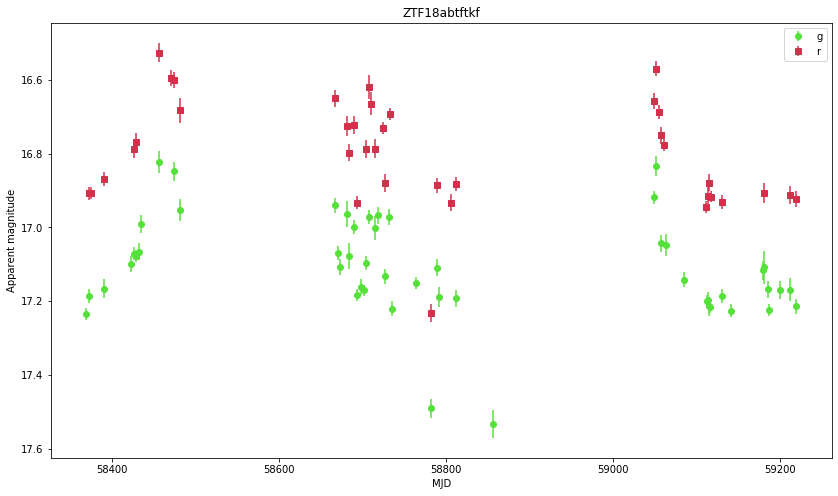

3FHL J0035.2+1514  no results
0    ZTF19abgzjrh
Name: oid, dtype: object
3FHL J0035.9+5950 / 1ES 0033+595 results: 


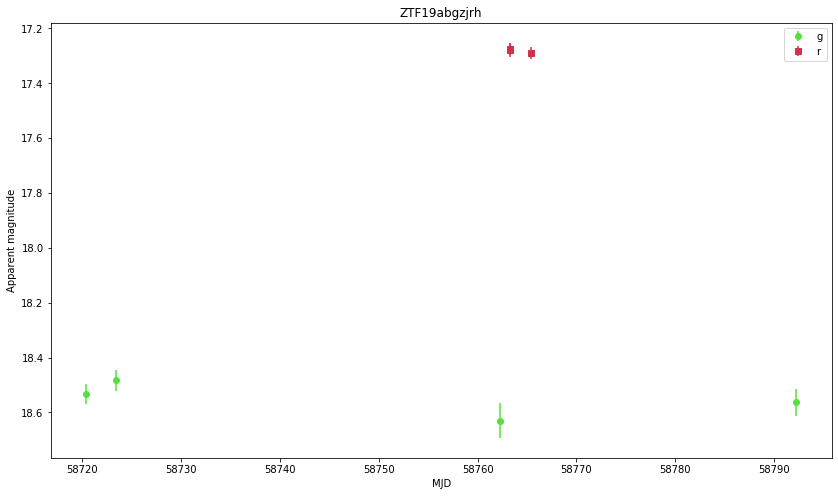

3FHL J0120.4-2701  no results
0    ZTF20abjmqnm
1    ZTF18achbdgm
Name: oid, dtype: object
3FHL J0136.5+3906 / B3 0133+388 results: 


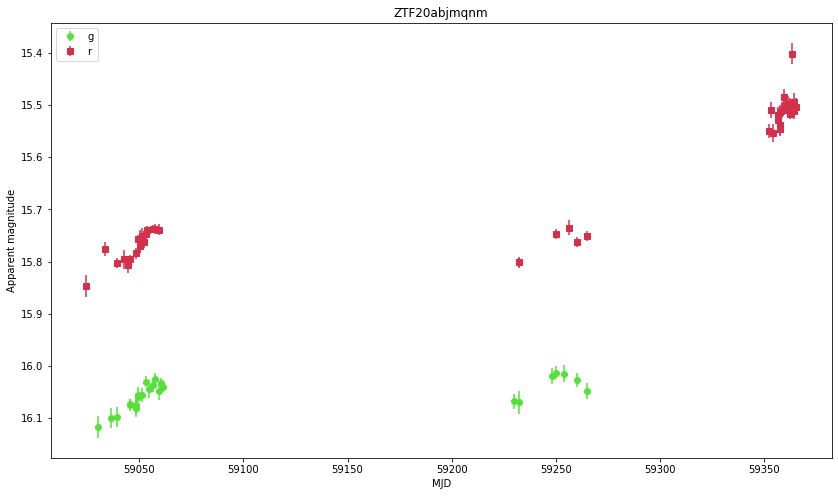

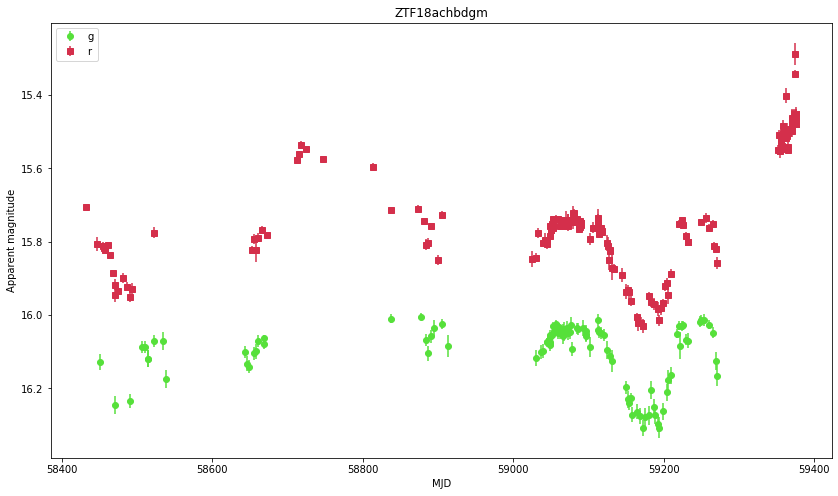

3FHL J0211.2+1051  no results
0    ZTF18aabezmq
Name: oid, dtype: object
3FHL J0222.6+4302 / 3C 66A results: 


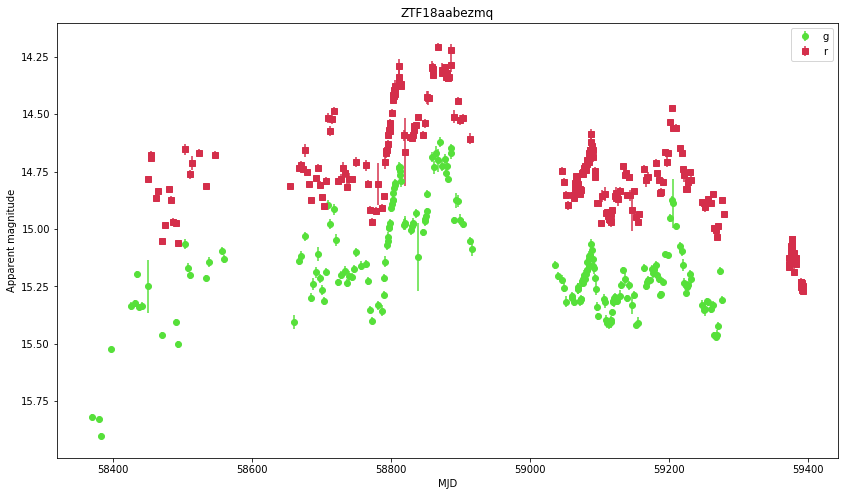

3FHL J0334.2-3726  no results
3FHL J0449.4-4350  no results
0    ZTF20aafanrl
1    ZTF17aacgwpq
Name: oid, dtype: object
3FHL J0521.7+2112 / TXS 0518+211 results: 


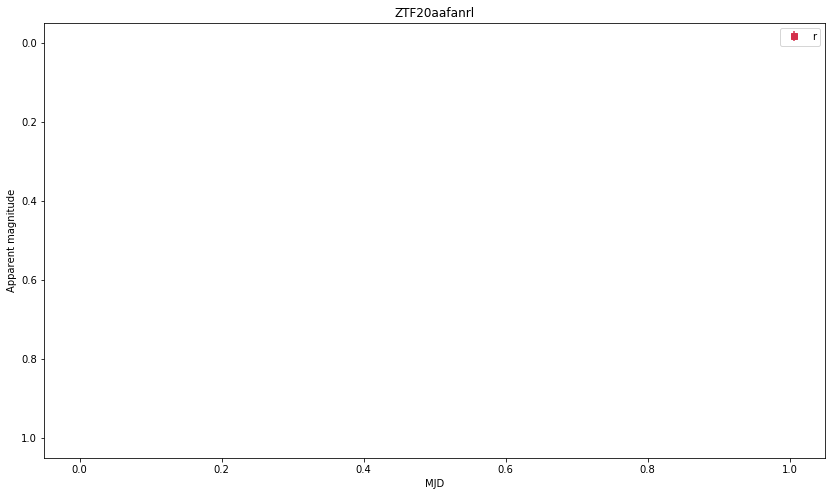

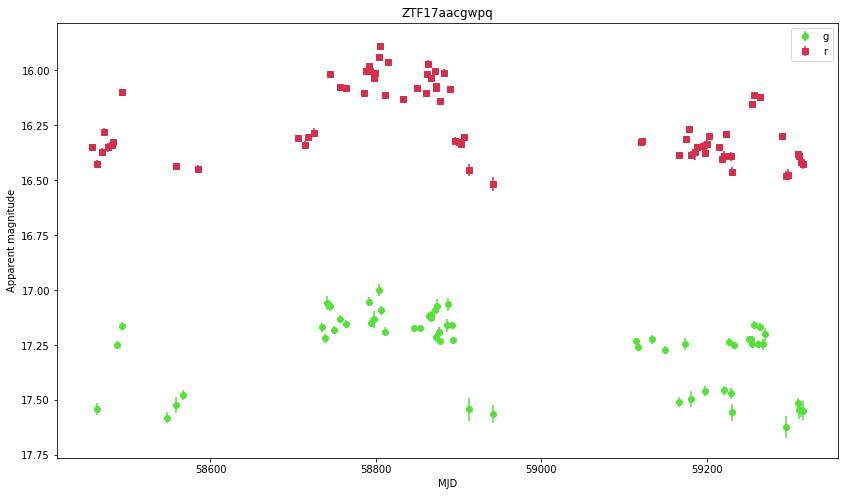

0    ZTF19abzmeot
1    ZTF18acwvxgw
2    ZTF21aagfgkl
Name: oid, dtype: object
3FHL J0650.7+2503 / 1ES 0647+250 results: 


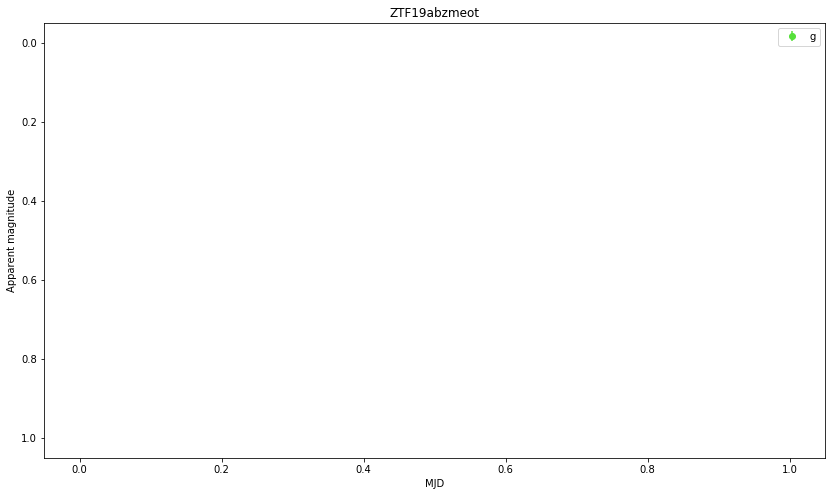

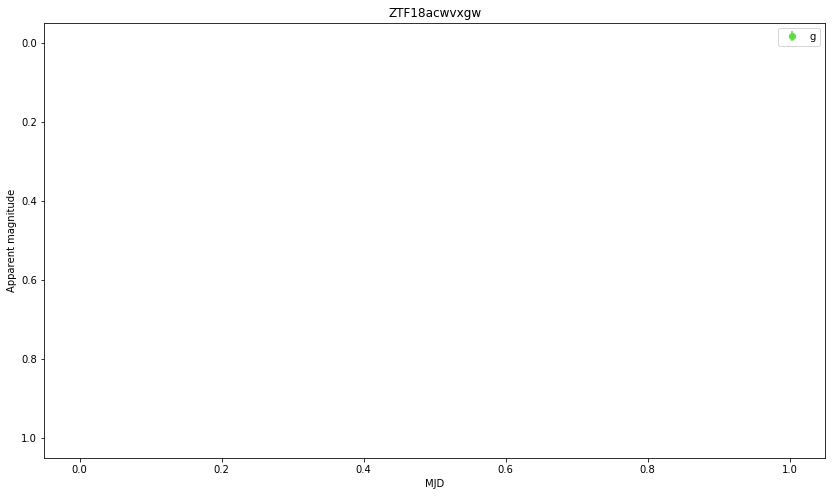

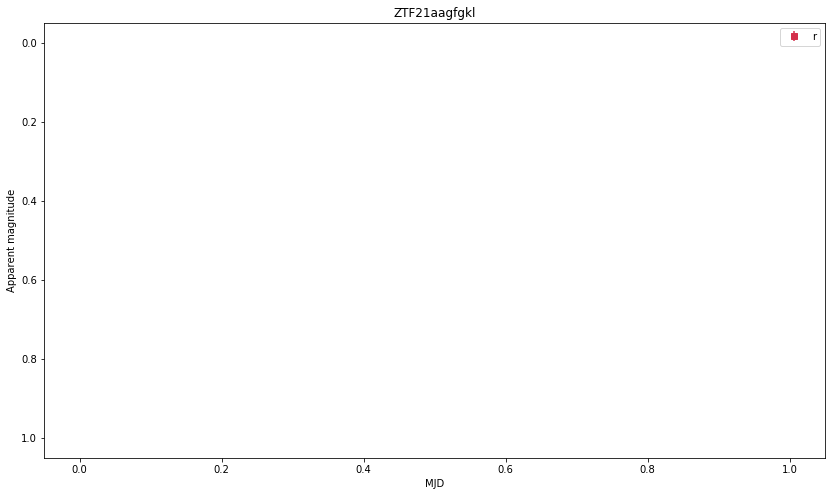

3FHL J0700.5-6611  no results
3FHL J0718.6-4319  no results
3FHL J0811.0-7529  no results
3FHL J0816.4-1311  no results
3FHL J0953.0-0840  no results
0    ZTF19aaoxfhu
Name: oid, dtype: object
3FHL J1022.7-0113 / RX J1022.7-0112 results: 


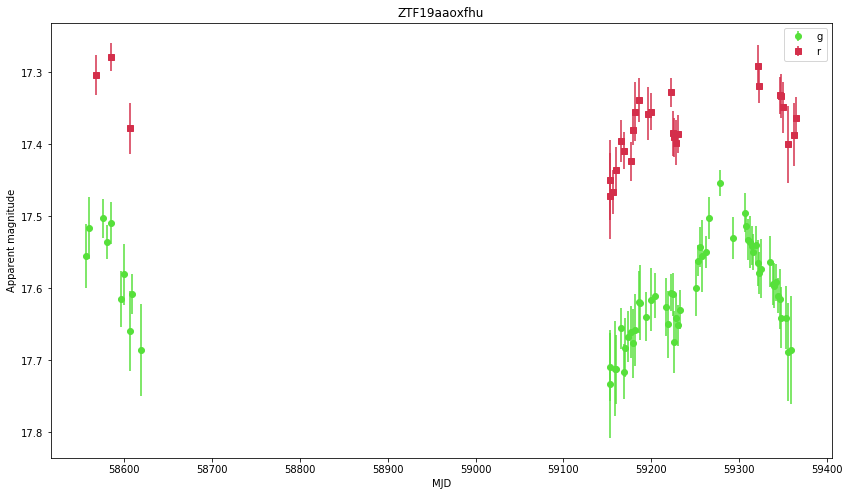

3FHL J1023.8-4335  no results
3FHL J1059.1-1134  no results
0    ZTF20aajbuuc
1    ZTF18aaifwpa
2    ZTF18acdvuby
3    ZTF18aahfflo
Name: oid, dtype: object
3FHL J1120.8+4212 / RBS 0970 results: 


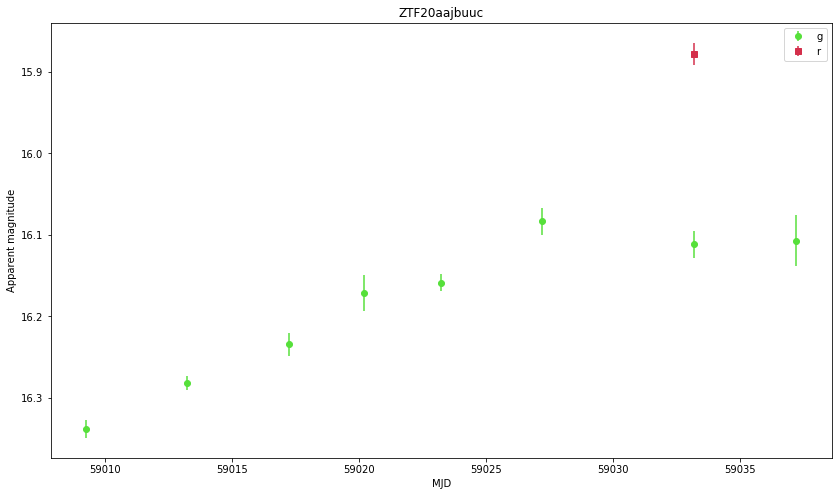

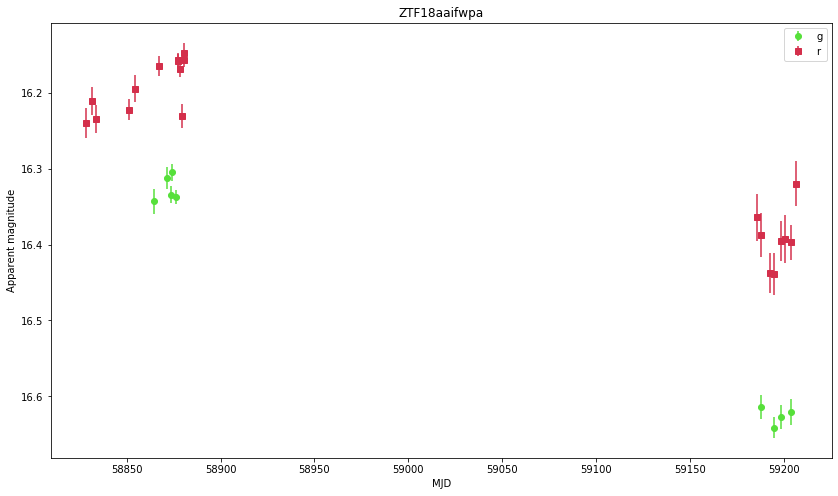

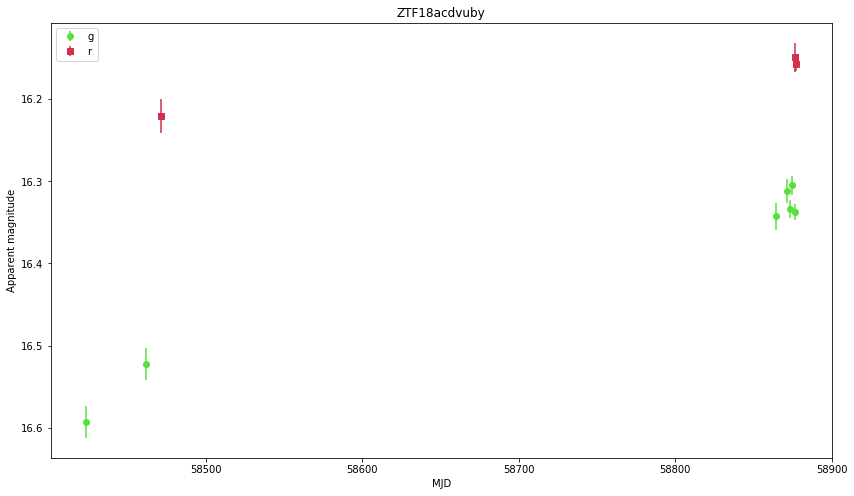

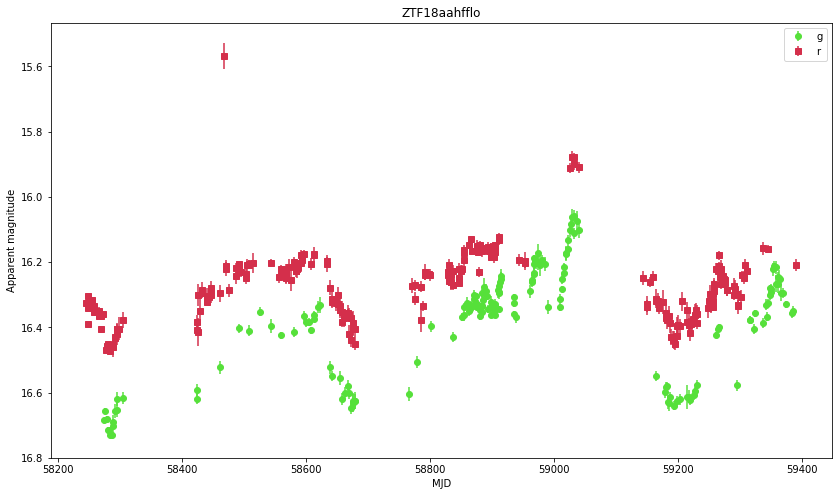

0    ZTF18aaaownr
1    ZTF19aaklsmy
Name: oid, dtype: object
3FHL J1248.3+5820 / PG 1246+586 results: 


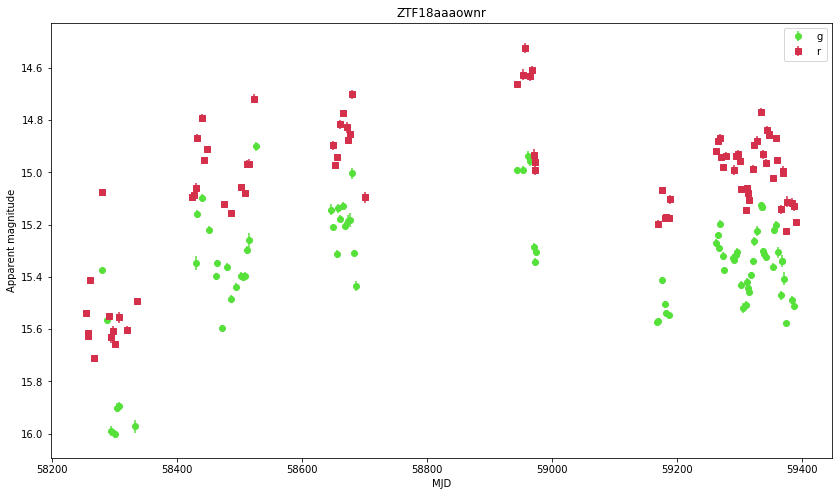

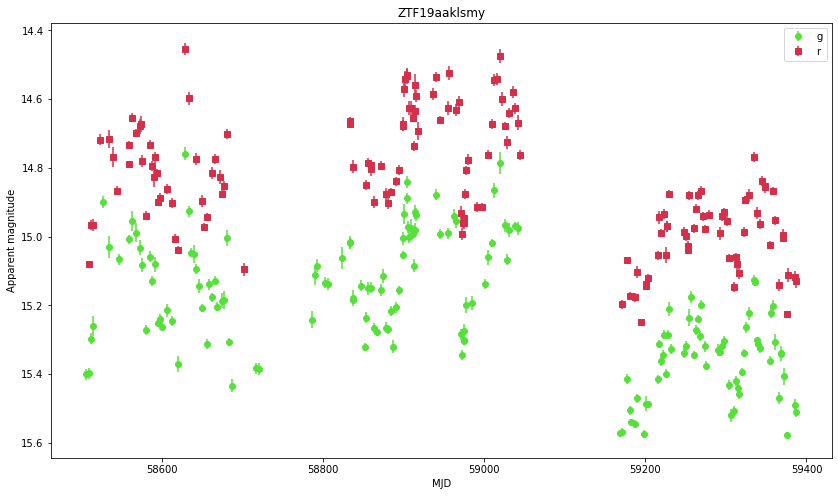

3FHL J1253.1+5300  no results
3FHL J1353.6-6640  no results
3FHL J1418.4-0233  no results
3FHL J1540.1+8154  no results
0    ZTF20aakzktc
1    ZTF18aaylblx
Name: oid, dtype: object
3FHL J1555.7+1111 / PG 1553+113 results: 


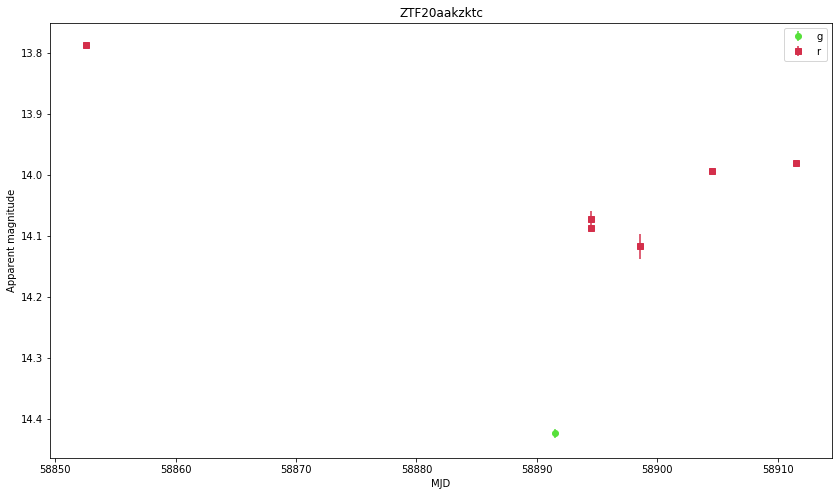

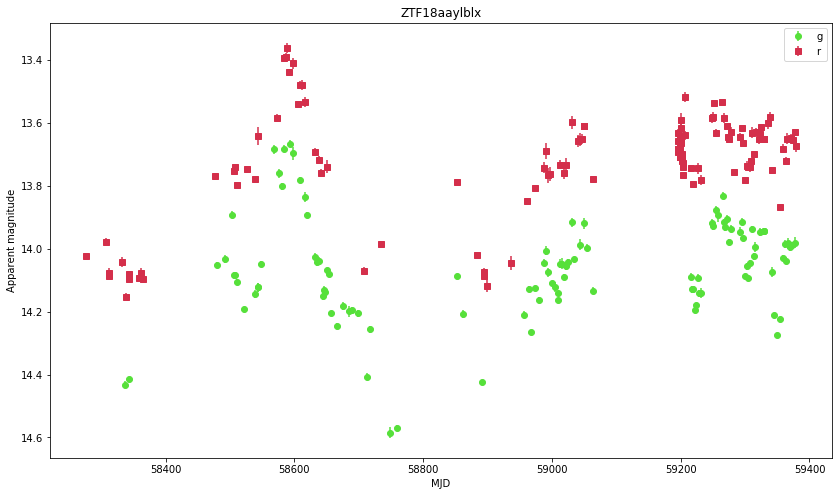

3FHL J1610.6-6649  no results
3FHL J1725.0+1152  no results
0    ZTF18aakyttg
Name: oid, dtype: object
3FHL J1754.1+3212 / RX J1754.1+3212 results: 


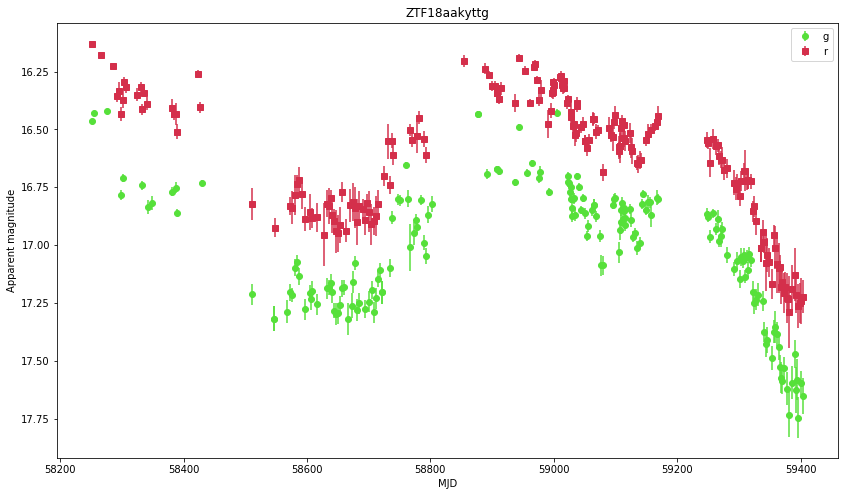

0    ZTF19aanvgnw
Name: oid, dtype: object
3FHL J1903.2+5540 / TXS 1902+556 results: 


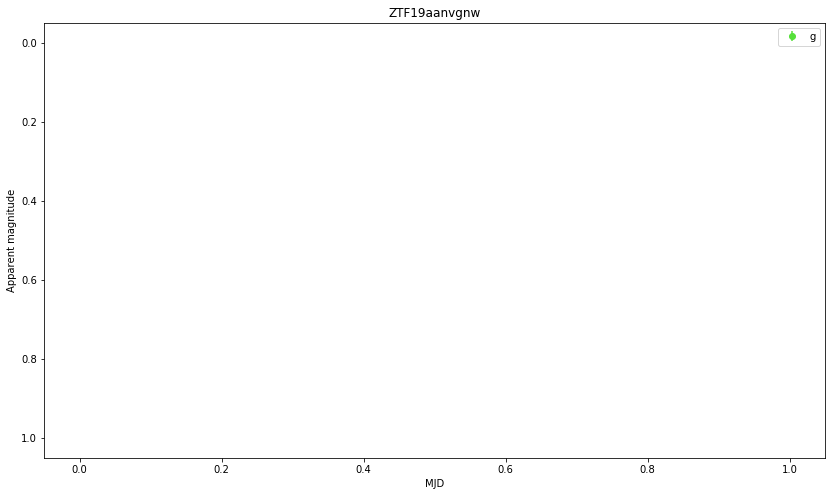

0    ZTF19aatuwxl
Name: oid, dtype: object
3FHL J1921.8-1607 / PMN J1921-1607 results: 


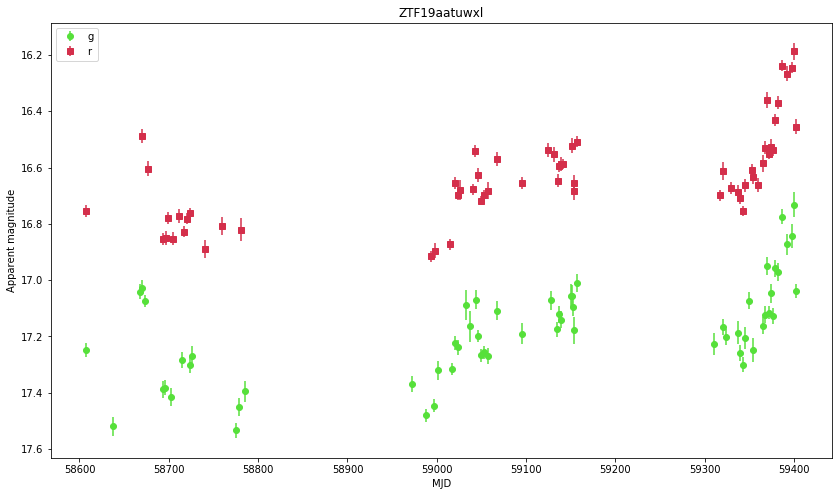

0    ZTF18acbwlfu
Name: oid, dtype: object
3FHL J1942.7+1033 / 1RXS J194246.3+103 results: 


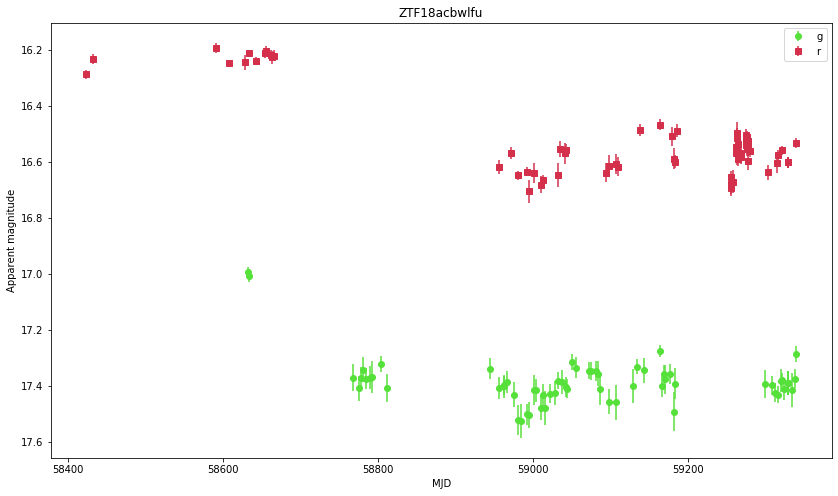

3FHL J1959.7-4725  no results
3FHL J2139.4-4234  no results
0    ZTF20acbleyh
1    ZTF20aazfhed
2    ZTF18abdeygo
Name: oid, dtype: object
3FHL J2243.9+2020 / RGB J2243+203 results: 


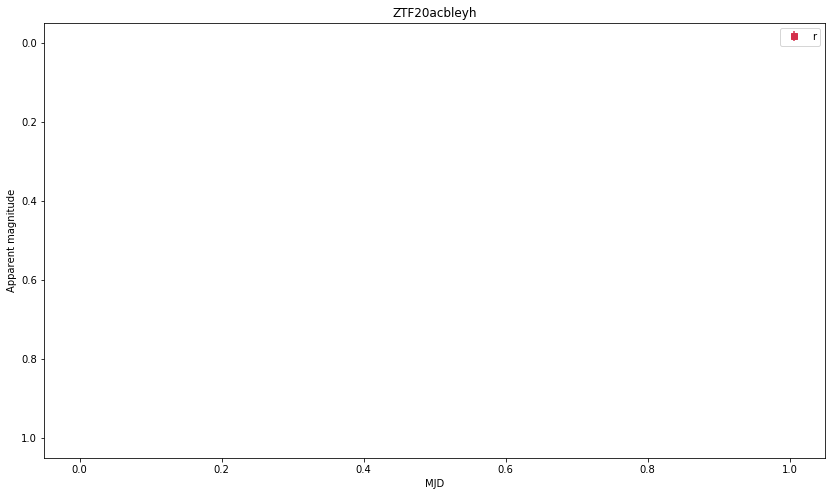

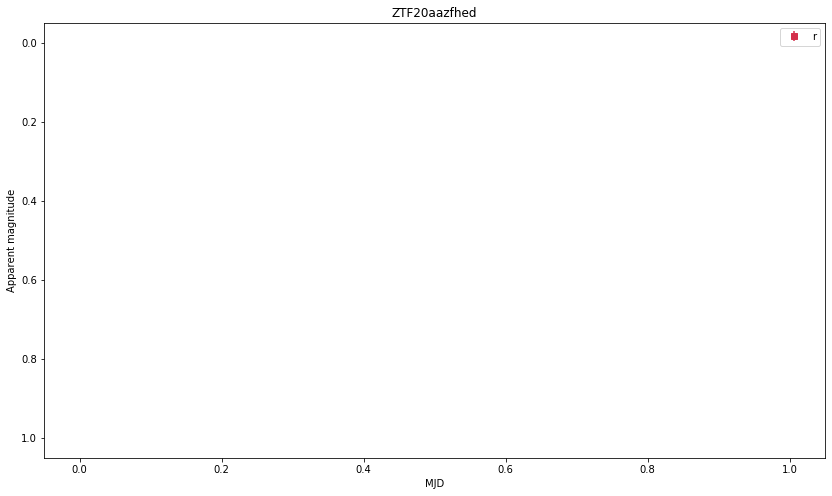

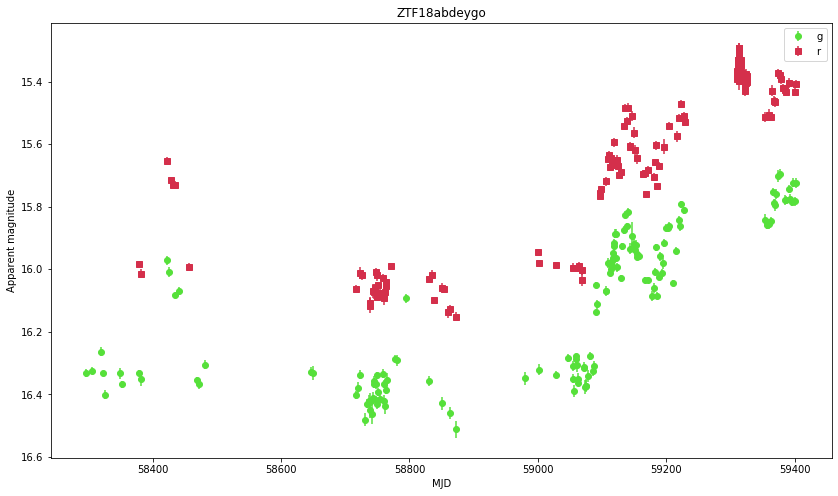

3FHL J2357.4-1717  no results
3FHL J0508.0+6737  no results
3FHL J0509.4+0542  no results
0    ZTF21abggfzc
Name: oid, dtype: object
3FHL J1427.0+2348 / PKS 1424+240 results: 


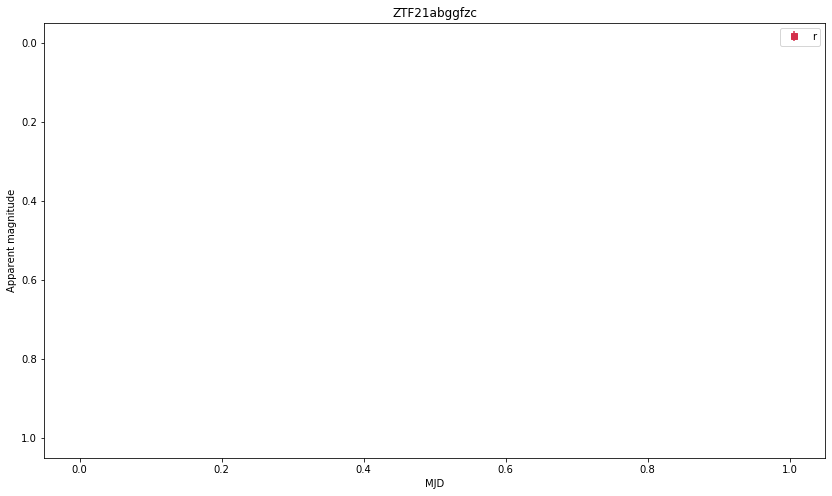

In [17]:
for i in range(len(df["3FHL_Name"])):
    result = query_results[i]
    try:
        print(result.oid)
        print(df["3FHL_Name"][i] + " / " + df["Assoc1_Name"][i], "results: ")
        for oid in query_results[i].oid.unique():
            getLCdata(oid, doLC=True);
            plt.show()
    except:
        print(df["3FHL_Name"][i], " no results")

In [18]:
query_results[2]

""


In [19]:
df["Alerce"] = query_results

In [20]:
df

,3FHL_Name,3FHL_CLASS,3FHL_RAJ2000,3FHL_DEJ2000,Assoc1_Name,z_for_MC,z_LL,z_quality_comment,Livetime,Extension_Flag,High_S/N_spectra,Comment,Action,Spectro-Observations,Imaging-Observations,Alerce
0,3FHL J0022.1-1855,bll,5.525983,-18.917013,1RXS J002209.2-185,0.774,True,NaN,20.0,N,Y?,z>0.774 Keck Shaw et al. 13 spectrum not in ar...,Spectroscopy in photometric minimum,NaN,NaN,Empty DataFrame Columns: [] Index: []
1,3FHL J0033.5-1921,bll,8.392931,-19.357483,KUV 00311-1938,0.506,True,Clear MgII absorber,1.0,N,Y,Pita et al. 14,Spectroscopy in photometric minimum,NaN,NaN,oid ndethist ncovhist mjdstarthi...
2,3FHL J0035.2+1514,bll,8.817282,15.243119,RX J0035.2+1515,0.300,False,NaN,13.0,N,Y,"Paiano et al. 17, SDSS",Spectroscopy in photometric minimum,NaN,NaN,Empty DataFrame Columns: [] Index: []
3,3FHL J0035.9+5950,bll,8.978161,59.835045,1ES 0033+595,0.300,False,Tentative redshift ?,1.0,NP,Y,"z=0.467 Tentative Paiano et al. 17, Nilsson et...",Spectroscopy in photometric minimum,NaN,NaN,oid ndethist ncovhist mjdstarthi...
4,3FHL J0120.4-2701,bll,20.115040,-27.027128,PKS 0118-272,0.558,True,NaN,4.0,N,Y,"Deep UVES spectra, HST imaging",Spectroscopy in photometric minimum,NaN,NaN,Empty DataFrame Columns: [] Index: []
5,3FHL J0136.5+3906,bll,24.139187,39.101215,B3 0133+388,0.300,False,NaN,1.0,NP,Y,"Several high S/N spectra, no result",Spectroscopy in photometric minimum,NaN,NaN,oid ndethist ncovhist mjdstarthi...
6,3FHL J0211.2+1051,BLL,32.814346,10.858768,MG1 J021114+1051,0.300,False,NaN,4.0,YP,Y,Extended Meisner & Romani 2010,Spectroscopy in photometric minimum,NaN,NaN,Empty DataFrame Columns: [] Index: []
7,3FHL J0222.6+4302,BLL,35.666264,43.034084,3C 66A,0.334,True,HST Ly alpha abs.+cluster,1.0,NP,Y,"Cluster z=0.34, Torres-Zafra et al. 18, Stadni...",Spectroscopy in photometric minimum,NaN,NaN,oid ndethist ncovhist mjdstarthi...
8,3FHL J0334.2-3726,bll,53.569492,-37.444336,PMN J0334-3725,0.300,False,NaN,16.0,n,Y,Shaw et al. 13 VLT spectrum,Spectroscopy in photometric minimum,NaN,NaN,Empty DataFrame Columns: [] Index: []
9,3FHL J0449.4-4350,bll,72.361565,-43.833763,PKS 0447-439,0.300,False,Possible cluster,1.0,n,Y,"Cluster z=0.343, Muriel et al. 15",Spectroscopy in photometric minimum,NaN,NaN,Empty DataFrame Columns: [] Index: []


## Fermi data

In [63]:
#RX J1754.1+3212 / 4FGL J1754.2+3212 / 3FHL J1754.1+3212 / ZTF18aakyttg 
import pickle
gammalc = open("EX1/lc.pkl", "rb")

lc = pickle.load(gammalc)

print(lc)

{'name': '4FGL J1754.2+3212', 'tmin': array([2.39587201e+08, 2.40451201e+08, 2.41315201e+08, 2.42179201e+08,
       2.43043201e+08, 2.43907201e+08, 2.44771201e+08, 2.45635201e+08,
       2.46499201e+08, 2.47363201e+08, 2.48227201e+08, 2.49091201e+08,
       2.49955201e+08, 2.50819201e+08, 2.51683201e+08, 2.52547201e+08,
       2.53411201e+08, 2.54275201e+08, 2.55139201e+08, 2.56003201e+08,
       2.56867201e+08, 2.57731201e+08, 2.58595201e+08, 2.59459201e+08,
       2.60323201e+08, 2.61187201e+08, 2.62051201e+08, 2.62915201e+08,
       2.63779201e+08, 2.64643201e+08, 2.65507201e+08, 2.66371201e+08,
       2.67235201e+08, 2.68099201e+08, 2.68963201e+08, 2.69827201e+08,
       2.70691201e+08, 2.71555201e+08, 2.72419201e+08, 2.73283201e+08,
       2.74147201e+08, 2.75011201e+08, 2.75875201e+08, 2.76739201e+08,
       2.77603201e+08, 2.78467201e+08, 2.79331201e+08, 2.80195201e+08,
       2.81059201e+08, 2.81923201e+08, 2.82787201e+08, 2.83651201e+08,
       2.84515201e+08, 2.85379201e+08, 

In [64]:
#create a mask to plot upper limits the bins that have a TS<9
n = 4
mask_ul = lc["ts"] <= n
mask_det = lc["ts"] > n

tmean = (lc['tmin_mjd'] + lc['tmax_mjd'])/2

<IPython.core.display.Javascript object>


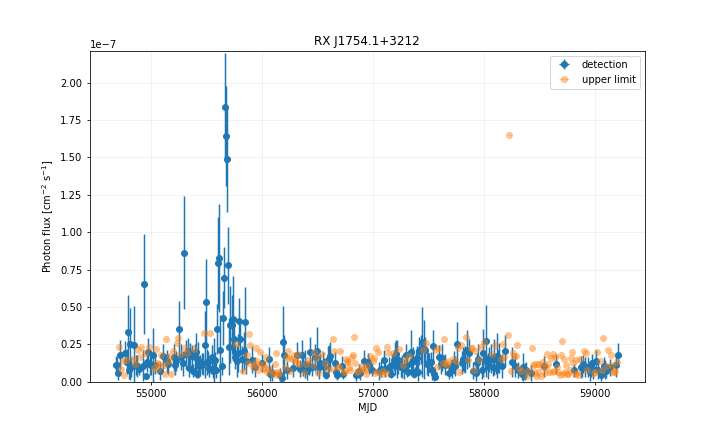

<IPython.core.display.Javascript object>


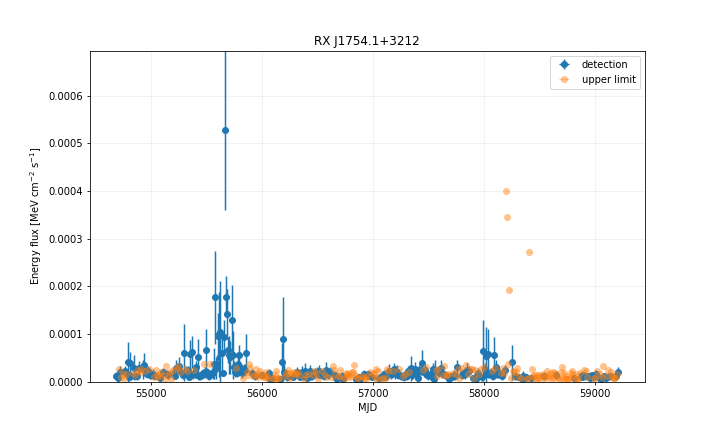

In [74]:
#Photon flux
plt.figure(figsize=(10, 6), dpi=80)

#detection

plt.errorbar(tmean[mask_det], lc['flux'][mask_det], yerr=lc['flux_err'][mask_det],xerr=10, linestyle='None', marker='o', label="detection")

#Upper limits
plt.errorbar(tmean[mask_ul], lc['flux_ul95'][mask_ul], xerr=10, linestyle='None', marker='o', label="upper limit", alpha = 0.4)

plt.title("RX J1754.1+3212")
plt.ylim(0, np.max(lc['flux'][mask_det])+ np.max(lc['flux_err'][mask_det]))
plt.xlabel('MJD')
plt.ylabel('Photon flux [cm$^{-2}$ s$^{-1}$]')
plt.legend()
plt.grid(alpha=0.2)
plt.show()

#Energy flux
plt.figure(figsize=(10, 6), dpi=80)

plt.errorbar(tmean[mask_det], lc['eflux'][mask_det], yerr=lc['eflux_err'][mask_det],xerr=10, linestyle='None', marker='o', label="detection")

#Upper limits
plt.errorbar(tmean[mask_ul], lc['eflux_ul95'][mask_ul], xerr=10, linestyle='None', marker='o', label="upper limit", alpha = 0.4)



plt.ylim(0, np.max(lc['eflux'][mask_det])+ np.max(lc['eflux_err'][mask_det]))
plt.title("RX J1754.1+3212")
plt.xlabel('MJD')
plt.ylabel('Energy flux [MeV cm$^{-2}$ s$^{-1}$]')
plt.legend()
plt.grid(alpha=0.2)
plt.show()

In [66]:
opt  = getLCdata("ZTF18aakyttg") #, doLC=True);

In [67]:
opt["lc_det"].columns

Index(['mjd', 'candid', 'fid', 'pid', 'diffmaglim', 'isdiffpos', 'nid',
       'distnr', 'magpsf', 'magpsf_corr', 'magpsf_corr_ext', 'magap',
       'magap_corr', 'sigmapsf', 'sigmapsf_corr', 'sigmapsf_corr_ext',
       'sigmagap', 'sigmagap_corr', 'ra', 'dec', 'rb', 'rbversion', 'drb',
       'magapbig', 'sigmagapbig', 'rfid', 'has_stamp', 'corrected', 'dubious',
       'candid_alert', 'step_id_corr', 'phase', 'parent_candid'],
      dtype='object')

In [68]:
def mag2uJy(mag):
    return 10**((8.9 - mag) / 2.5) * 1e6
def emag2euJy(mag, emag):
    return (mag2uJy(mag - emag) - mag2uJy(mag))

In [69]:
flux = mag2uJy(opt["lc_det"].magpsf_corr)
flux_e = emag2euJy(opt["lc_det"].magpsf_corr, opt["lc_det"].sigmapsf_corr)

In [70]:
opt["lc_det"]["flux"] = flux
opt["lc_det"]["flux_e"] = flux_e

In [71]:
opt["lc_det"]

,mjd,candid,fid,pid,diffmaglim,isdiffpos,nid,distnr,magpsf,magpsf_corr,...,rfid,has_stamp,corrected,dubious,candid_alert,step_id_corr,phase,parent_candid,flux,flux_e
0,58252.414468,498414462315010003,2,498414462315,20.826900,-1,498,0.224237,18.356200,16.130484,...,NaN,False,True,False,None,bulk_1.0.0,None,5.223602e+17,1281.759072,1.281759e+43
1,58252.452153,498452152315015017,1,498452152315,20.952000,1,498,0.420924,19.199500,16.462969,...,NaN,False,True,False,None,bulk_1.0.0,None,5.223602e+17,943.653163,9.436532e+42
2,58255.360822,501360822315015001,1,501360822315,20.730500,1,501,0.596014,18.850200,16.430328,...,NaN,False,True,False,None,bulk_1.0.0,None,5.223602e+17,972.453402,9.724534e+42
3,58266.316424,512316422315010001,2,512316422315,19.834700,-1,512,0.253320,18.046900,16.177560,...,NaN,False,True,False,None,bulk_1.0.0,None,5.223602e+17,1227.371402,1.227371e+43
4,58276.360197,522360192315015012,1,522360192315,20.940105,1,522,0.206399,18.760817,16.420343,...,682120123.0,False,True,False,None,bulk_1.0.0,None,5.442456e+17,981.437843,9.814378e+42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,59399.344444,1645344442315010016,2,1645344442315,20.783910,-1,1645,0.099760,16.410702,17.251207,...,682120223.0,True,True,False,None,correction_0.0.1,None,NaN,456.580332,2.843192e+01
380,59401.342870,1647342872315010010,2,1647342872315,20.718382,-1,1647,0.125581,16.414803,17.242367,...,682120223.0,True,True,False,None,correction_0.0.1,None,NaN,460.312957,3.694495e+01
381,59401.370417,1647370412315010002,1,1647370412315,20.673532,-1,1647,0.140535,17.077934,17.596575,...,682120123.0,True,True,False,None,correction_0.0.1,None,NaN,332.177338,1.299994e+01
382,59403.308102,1649308102315010007,2,1649308102315,20.782835,-1,1649,0.118727,16.423735,17.223469,...,682120223.0,True,True,False,None,correction_0.0.1,None,NaN,468.395161,1.890204e+01


<IPython.core.display.Javascript object>


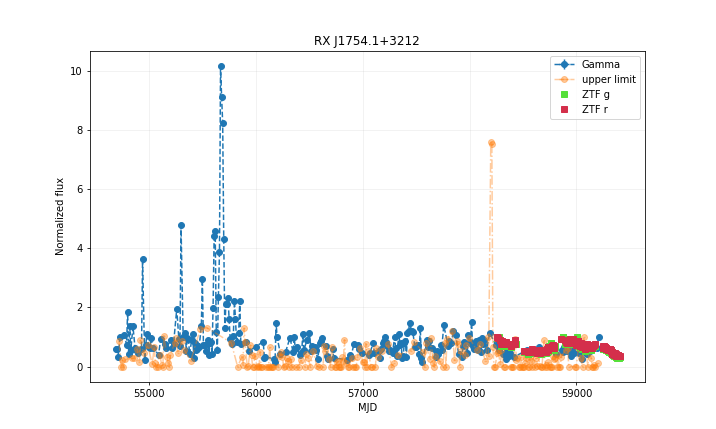

In [72]:
%matplotlib notebook
%matplotlib notebook

#Photon flux
plt.figure(figsize=(10, 6), dpi=80)

#detection
mask_dates = (tmean>np.min(opt["lc_det"].mjd)) & (tmean<np.max(opt["lc_det"].mjd))

plt.errorbar(tmean[mask_det], lc['flux'][mask_det]/np.max(lc['flux'][mask_det&mask_dates]), 
             yerr=lc['flux_err'][mask_det],xerr=10, linestyle='--', marker='o', label="Gamma")

#Upper limits
plt.errorbar(tmean[mask_ul], lc['eflux'][mask_ul]/np.max(lc['eflux'][mask_ul&mask_dates]), xerr=10, linestyle='-.', marker='o', label="upper limit", alpha = 0.4)


labels = {1: 'g', 2: 'r'}
colors = {1: '#56E03A', 2: '#D42F4B'}
markers = {1: 'o', 2: 's'}
for fid in [1, 2]:
    maskfid = opt["lc_det"]["fid"] == fid
    plt.errorbar(opt["lc_det"]["mjd"][maskfid], opt["lc_det"]["flux"][maskfid]/np.max(opt["lc_det"]["flux"][maskfid]),
                 yerr = None, marker='s', c=colors[fid], label="ZTF "+ labels[fid], linestyle="None")

#plt.ylim(0, np.max(lc['flux'][mask_det])+ np.max(lc['flux_err'][mask_det]))
plt.title("RX J1754.1+3212")
plt.xlabel('MJD')
plt.ylabel('Normalized flux')
plt.legend()
plt.grid(alpha=0.2)
plt.show()

# Ex 2
4FGL J0136.5+3906 / B3 0133+388  / ZTF18achbdgm 

In [73]:
import pickle
gammalc1 = open("EX2/lc1.pkl", "rb")
gammalc2 = open("EX2/lc2.pkl", "rb")

lc1 = pickle.load(gammalc1)
lc2 = pickle.load(gammalc2)
print(lc2)

{'name': '4FGL J0136.5+3906', 'tmin': array([5.67993605e+08, 5.68598405e+08, 5.69203205e+08, 5.69808005e+08,
       5.70412805e+08, 5.71017605e+08, 5.71622405e+08, 5.72227205e+08,
       5.72832005e+08, 5.73436805e+08, 5.74041605e+08, 5.74646405e+08,
       5.75251205e+08, 5.75856005e+08, 5.76460805e+08, 5.77065605e+08,
       5.77670405e+08, 5.78275205e+08, 5.78880005e+08, 5.79484805e+08,
       5.80089605e+08, 5.80694405e+08, 5.81299205e+08, 5.81904005e+08,
       5.82508805e+08, 5.83113605e+08, 5.83718405e+08, 5.84323205e+08,
       5.84928005e+08, 5.85532805e+08, 5.86137605e+08, 5.86742405e+08,
       5.87347205e+08, 5.87952005e+08, 5.88556805e+08, 5.89161605e+08,
       5.89766405e+08, 5.90371205e+08, 5.90976005e+08, 5.91580805e+08,
       5.92185605e+08, 5.92790405e+08, 5.93395205e+08, 5.94000005e+08,
       5.94604805e+08, 5.95209605e+08, 5.95814405e+08, 5.96419205e+08,
       5.97024005e+08, 5.97628805e+08, 5.98233605e+08, 5.98838405e+08,
       5.99443205e+08, 6.00048005e+08, 

In [32]:
z = {**lc1, **lc2}

In [33]:
#create a mask to plot upper limits the bins that have a TS<9
n = 2
mask_ul = z["ts"]<=n
mask_det = z["ts"]>n

tmean = (z['tmin_mjd'] + z['tmax_mjd'])/2

In [34]:
z

{'name': '4FGL J0136.5+3906',
 'tmin': array([5.67993605e+08, 5.68598405e+08, 5.69203205e+08, 5.69808005e+08,
        5.70412805e+08, 5.71017605e+08, 5.71622405e+08, 5.72227205e+08,
        5.72832005e+08, 5.73436805e+08, 5.74041605e+08, 5.74646405e+08,
        5.75251205e+08, 5.75856005e+08, 5.76460805e+08, 5.77065605e+08,
        5.77670405e+08, 5.78275205e+08, 5.78880005e+08, 5.79484805e+08,
        5.80089605e+08, 5.80694405e+08, 5.81299205e+08, 5.81904005e+08,
        5.82508805e+08, 5.83113605e+08, 5.83718405e+08, 5.84323205e+08,
        5.84928005e+08, 5.85532805e+08, 5.86137605e+08, 5.86742405e+08,
        5.87347205e+08, 5.87952005e+08, 5.88556805e+08, 5.89161605e+08,
        5.89766405e+08, 5.90371205e+08, 5.90976005e+08, 5.91580805e+08,
        5.92185605e+08, 5.92790405e+08, 5.93395205e+08, 5.94000005e+08,
        5.94604805e+08, 5.95209605e+08, 5.95814405e+08, 5.96419205e+08,
        5.97024005e+08, 5.97628805e+08, 5.98233605e+08, 5.98838405e+08,
        5.99443205e+08, 6.

In [54]:
lc = z

In [55]:
lc

{'name': '4FGL J1120.8+4212',
 'tmin': array([5.67993605e+08, 5.68598405e+08, 5.69203205e+08, 5.69808005e+08,
        5.70412805e+08, 5.71017605e+08, 5.71622405e+08, 5.72227205e+08,
        5.72832005e+08, 5.73436805e+08, 5.74041605e+08, 5.74646405e+08,
        5.75251205e+08, 5.75856005e+08, 5.76460805e+08, 5.77065605e+08,
        5.77670405e+08, 5.78275205e+08, 5.78880005e+08, 5.79484805e+08,
        5.80089605e+08, 5.80694405e+08, 5.81299205e+08, 5.81904005e+08,
        5.82508805e+08, 5.83113605e+08, 5.83718405e+08, 5.84323205e+08,
        5.84928005e+08, 5.85532805e+08, 5.86137605e+08, 5.86742405e+08,
        5.87347205e+08, 5.87952005e+08, 5.88556805e+08, 5.89161605e+08,
        5.89766405e+08, 5.90371205e+08, 5.90976005e+08, 5.91580805e+08,
        5.92185605e+08, 5.92790405e+08, 5.93395205e+08, 5.94000005e+08,
        5.94604805e+08, 5.95209605e+08, 5.95814405e+08, 5.96419205e+08,
        5.97024005e+08, 5.97628805e+08, 5.98233605e+08, 5.98838405e+08,
        5.99443205e+08, 6.

In [56]:
n = 2
mask_ul = lc1["ts"]<=n
mask_det = lc1["ts"]>n

tmean = (lc1['tmin_mjd'] + lc1['tmax_mjd'])/2

<IPython.core.display.Javascript object>


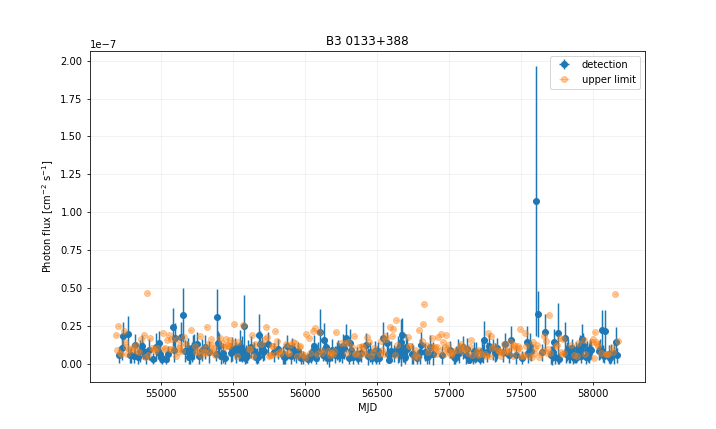

<IPython.core.display.Javascript object>


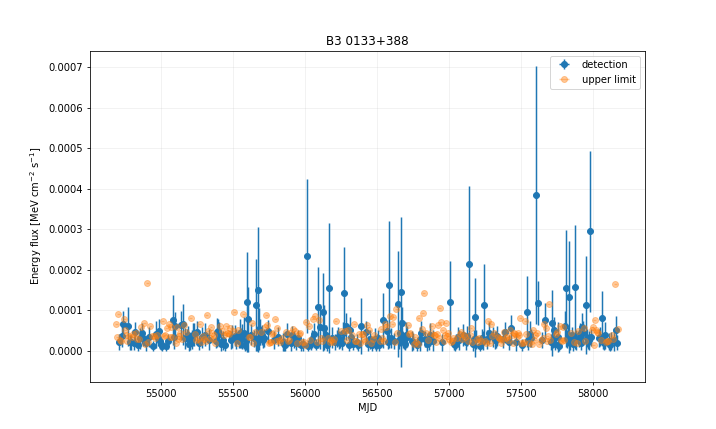

In [57]:
#Photon flux
plt.figure(figsize=(10, 6), dpi=80)

#detection

plt.errorbar(tmean[mask_det], lc1['flux'][mask_det], yerr=lc1['flux_err'][mask_det],xerr=10, linestyle='None', marker='o', label="detection")

#Upper limits
plt.errorbar(tmean[mask_ul], lc1['flux_ul95'][mask_ul], xerr=10, linestyle='None', marker='o', label="upper limit", alpha = 0.4)

plt.title("B3 0133+388")
#plt.ylim(0, np.max(z['flux'][mask_det])+ np.max(z['flux_err'][mask_det]))
plt.xlabel('MJD')
plt.ylabel('Photon flux [cm$^{-2}$ s$^{-1}$]')
plt.legend()
plt.grid(alpha=0.2)
plt.show()

#Energy flux
plt.figure(figsize=(10, 6), dpi=80)

plt.errorbar(tmean[mask_det], lc1['eflux'][mask_det], yerr=lc1['eflux_err'][mask_det],xerr=10, linestyle='None', marker='o', label="detection")

#Upper limits
plt.errorbar(tmean[mask_ul], lc1['eflux_ul95'][mask_ul], xerr=10, linestyle='None', marker='o', label="upper limit", alpha = 0.4)



#plt.ylim(0, np.max(lc['eflux'][mask_det])+ np.max(lc['eflux_err'][mask_det]))
plt.title("B3 0133+388")
plt.xlabel('MJD')
plt.ylabel('Energy flux [MeV cm$^{-2}$ s$^{-1}$]')
plt.legend()
plt.grid(alpha=0.2)
plt.show()

# EX3
4FGL J1120.8+4212 / RBS 0970 / ZTF18aahfflo 

In [58]:
import pickle
gammalc1 = open("EX3/lc1.pkl", "rb")
gammalc2 = open("EX3/lc2.pkl", "rb")

lc1 = pickle.load(gammalc1)
lc2 = pickle.load(gammalc2)
print(lc2)

{'name': '4FGL J1120.8+4212', 'tmin': array([5.67993605e+08, 5.68598405e+08, 5.69203205e+08, 5.69808005e+08,
       5.70412805e+08, 5.71017605e+08, 5.71622405e+08, 5.72227205e+08,
       5.72832005e+08, 5.73436805e+08, 5.74041605e+08, 5.74646405e+08,
       5.75251205e+08, 5.75856005e+08, 5.76460805e+08, 5.77065605e+08,
       5.77670405e+08, 5.78275205e+08, 5.78880005e+08, 5.79484805e+08,
       5.80089605e+08, 5.80694405e+08, 5.81299205e+08, 5.81904005e+08,
       5.82508805e+08, 5.83113605e+08, 5.83718405e+08, 5.84323205e+08,
       5.84928005e+08, 5.85532805e+08, 5.86137605e+08, 5.86742405e+08,
       5.87347205e+08, 5.87952005e+08, 5.88556805e+08, 5.89161605e+08,
       5.89766405e+08, 5.90371205e+08, 5.90976005e+08, 5.91580805e+08,
       5.92185605e+08, 5.92790405e+08, 5.93395205e+08, 5.94000005e+08,
       5.94604805e+08, 5.95209605e+08, 5.95814405e+08, 5.96419205e+08,
       5.97024005e+08, 5.97628805e+08, 5.98233605e+08, 5.98838405e+08,
       5.99443205e+08, 6.00048005e+08, 

In [59]:
z = {**lc1, **lc2}

In [60]:
#create a mask to plot upper limits the bins that have a TS<9
n = 4
mask_ul = z["ts"]<=n
mask_det = z["ts"]>n

tmean = (z['tmin_mjd'] + z['tmax_mjd'])/2

In [61]:
lc = z

<IPython.core.display.Javascript object>


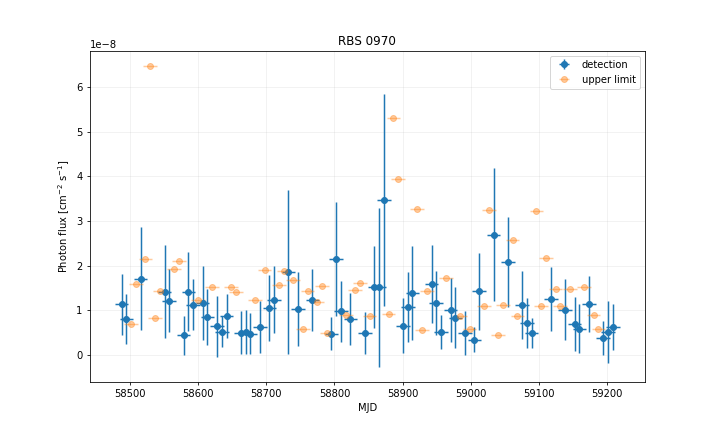

<IPython.core.display.Javascript object>


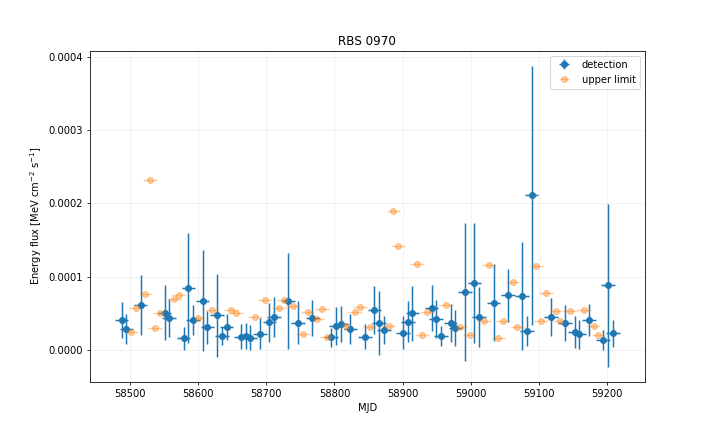

In [62]:
#Photon flux
plt.figure(figsize=(10, 6), dpi=80)

#detection

plt.errorbar(tmean[mask_det], lc['flux'][mask_det], yerr=lc['flux_err'][mask_det],xerr=10, linestyle='None', marker='o', label="detection")

#Upper limits
plt.errorbar(tmean[mask_ul], lc['flux_ul95'][mask_ul], xerr=10, linestyle='None', marker='o', label="upper limit", alpha = 0.4)

plt.title("RBS 0970")
#plt.ylim(0, np.max(z['flux'][mask_det])+ np.max(z['flux_err'][mask_det]))
plt.xlabel('MJD')
plt.ylabel('Photon flux [cm$^{-2}$ s$^{-1}$]')
plt.legend()
plt.grid(alpha=0.2)
plt.show()

#Energy flux
plt.figure(figsize=(10, 6), dpi=80)

plt.errorbar(tmean[mask_det], lc['eflux'][mask_det], yerr=lc['eflux_err'][mask_det],xerr=10, linestyle='None', marker='o', label="detection")

#Upper limits
plt.errorbar(tmean[mask_ul], lc['eflux_ul95'][mask_ul], xerr=10, linestyle='None', marker='o', label="upper limit", alpha = 0.4)



#plt.ylim(0, np.max(lc['eflux'][mask_det])+ np.max(lc['eflux_err'][mask_det]))
plt.title("RBS 0970")
plt.xlabel('MJD')
plt.ylabel('Energy flux [MeV cm$^{-2}$ s$^{-1}$]')
plt.legend()
plt.grid(alpha=0.2)
plt.show()

In [75]:
opt  = getLCdata("ZTF18aahfflo")# , doLC=True);

In [76]:
def mag2uJy(mag):
    return 10**((8.9 - mag) / 2.5) * 1e6
def emag2euJy(mag, emag):
    return (mag2uJy(mag - emag) - mag2uJy(mag))

In [77]:
flux = mag2uJy(opt["lc_det"].magpsf_corr)
flux_e = emag2euJy(opt["lc_det"].magpsf_corr, opt["lc_det"].sigmapsf_corr)

opt["lc_det"]["flux"] = flux
opt["lc_det"]["flux_e"] = flux_e

<IPython.core.display.Javascript object>


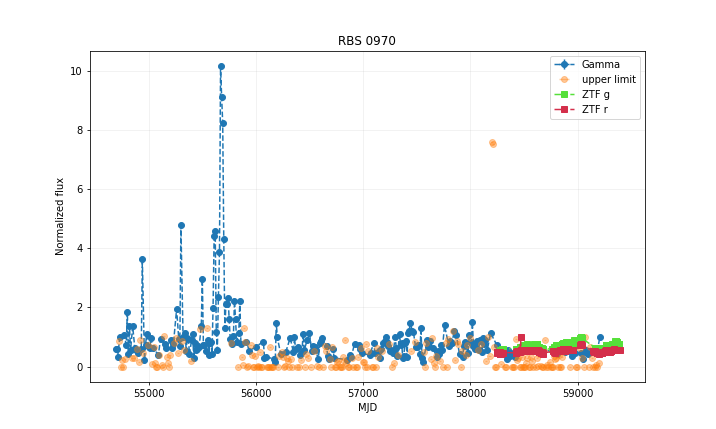

In [78]:
%matplotlib notebook
%matplotlib notebook

#Photon flux
plt.figure(figsize=(10, 6), dpi=80)

#detection
mask_dates = (tmean>np.min(opt["lc_det"].mjd)) & (tmean<np.max(opt["lc_det"].mjd))

plt.errorbar(tmean[mask_det], lc['flux'][mask_det]/np.max(lc['flux'][mask_det&mask_dates]), yerr=lc['flux_err'][mask_det],
             xerr=7, linestyle='--', marker='o', label="Gamma")

#Upper limits
plt.errorbar(tmean[mask_ul], lc['eflux'][mask_ul]/np.max(lc['eflux'][mask_ul&mask_dates]), xerr=10, linestyle='None', marker='o', label="upper limit", alpha = 0.4)


labels = {1: 'g', 2: 'r'}
colors = {1: '#56E03A', 2: '#D42F4B'}
markers = {1: 'o', 2: 's'}
for fid in [1, 2]:
    maskfid = opt["lc_det"]["fid"] == fid
    plt.errorbar(opt["lc_det"]["mjd"][maskfid], opt["lc_det"]["flux"][maskfid]/np.max(opt["lc_det"]["flux"][maskfid]),
                 yerr = None, marker='s', c=colors[fid], label="ZTF "+ labels[fid], linestyle="-.")

#plt.ylim(0, np.max(lc['flux'][mask_det])+ np.max(lc['flux_err'][mask_det]))
plt.title("RBS 0970")
plt.xlabel('MJD')
plt.ylabel('Normalized flux')
plt.legend()
plt.grid(alpha=0.2)
plt.show()

In [82]:
cat = pd.read_csv("EX3/catalina.csv")

In [80]:
cat

,MasterID,Mag,Magerr,RA,Dec,MJD,Blend
0,1140047052440,16.69,0.08,170.20036,42.20351,53712.44790,0
1,1140047052440,16.67,0.08,170.20035,42.20353,53712.45740,0
2,1140047052440,16.69,0.08,170.20023,42.20355,53712.46691,0
3,1140047052440,16.65,0.08,170.20023,42.20353,53712.47638,0
4,1140047052440,16.63,0.07,170.20026,42.20356,53734.41425,0
...,...,...,...,...,...,...,...
310,1140047052440,16.19,0.07,170.20020,42.20355,56419.26411,0
311,1140047052440,16.37,0.07,170.20027,42.20356,56450.18571,0
312,1140047052440,16.35,0.07,170.20024,42.20360,56450.19105,0
313,1140047052440,16.30,0.07,170.20028,42.20355,56450.19649,0


In [81]:
flux_cat= mag2uJy(cat["Mag"])
flux_e_cat  = emag2euJy(cat["Mag"], cat["Magerr"])

In [51]:
n = 4
mask_ul = lc1["ts"]<=n
mask_det = lc1["ts"]>n

tmean = (lc1['tmin_mjd'] + lc1['tmax_mjd'])/2

<IPython.core.display.Javascript object>


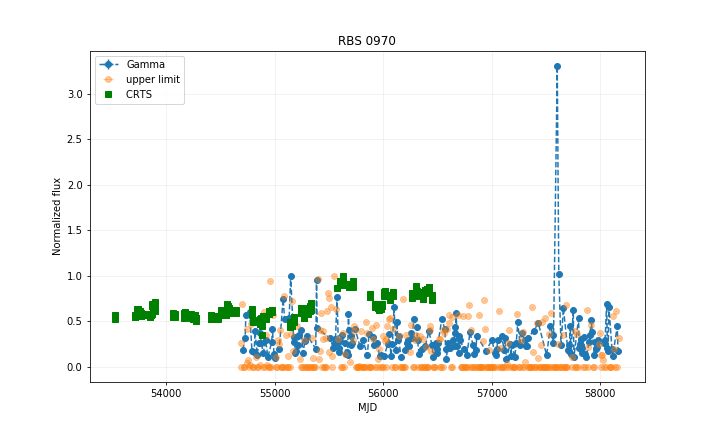

In [52]:
%matplotlib notebook
%matplotlib notebook

#Photon flux
plt.figure(figsize=(10, 6), dpi=80)

#detection
mask_dates = (tmean>np.min(cat.MJD)) & (tmean<np.max(cat.MJD))

plt.errorbar(tmean[mask_det], lc1['flux'][mask_det]/np.max(lc1['flux'][mask_det&mask_dates]), yerr=lc1['flux_err'][mask_det],
             xerr=7, linestyle='--', marker='o', label="Gamma")

#Upper limits
plt.errorbar(tmean[mask_ul], lc1['eflux'][mask_ul]/np.max(lc1['eflux'][mask_ul&mask_dates]), xerr=7, linestyle='None', marker='o', label="upper limit", alpha = 0.4)


labels = {1: 'g', 2: 'r'}
colors = {1: '#56E03A', 2: '#D42F4B'}
markers = {1: 'o', 2: 's'}
#for fid in [1, 2]:
 #   maskfid = opt["lc_det"]["fid"] == fid
  #  plt.errorbar(opt["lc_det"]["mjd"][maskfid], opt["lc_det"]["flux"][maskfid]/np.max(opt["lc_det"]["flux"][maskfid]),
   #              yerr = None, marker='s', c=colors[fid], label="ZTF "+ labels[fid], linestyle="-.")

plt.errorbar(cat["MJD"], flux_cat/np.max(flux_cat),
                 yerr = None, marker='s', c="g", label="CRTS ", linestyle="None")

#plt.ylim(0, np.max(lc['flux'][mask_det])+ np.max(lc['flux_err'][mask_det]))
plt.title("RBS 0970")
plt.xlabel('MJD')
plt.ylabel('Normalized flux')
plt.legend()
plt.grid(alpha=0.2)